### Preprocesamiento de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

df = pd.read_csv('./train.csv')

df.head(10)

,ID,review_es,sentimiento
0,0,Uno de los otros críticos ha mencionado que de...,positivo
1,1,Una pequeña pequeña producción.La técnica de f...,positivo
2,2,Pensé que esta era una manera maravillosa de p...,positivo
3,3,"Básicamente, hay una familia donde un niño peq...",negativo
4,4,"El ""amor en el tiempo"" de Petter Mattei es una...",positivo
5,5,Probablemente mi película favorita de todos lo...,positivo
6,6,Seguro que me gustaría ver una resurrección de...,positivo
7,7,"Este espectáculo fue una idea increíble, fresc...",negativo
8,8,Alentados por los comentarios positivos sobre ...,negativo
9,9,"Si te gusta la risa original desgarradora, te ...",positivo


Text(0.5, 1.0, 'Porcentaje en sentimiento')

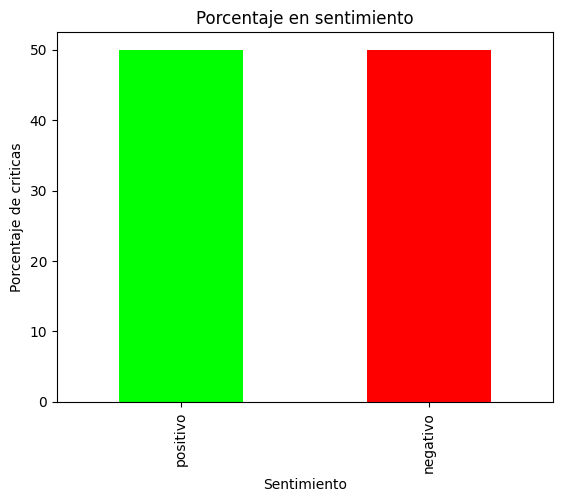

In [2]:
df_porcentaje = df['sentimiento'].value_counts(normalize=True)*100

df_porcentaje.plot(kind='bar',color=[(0,1,0),(1,0,0)])
plt.ylabel("Porcentaje de criticas")
plt.xlabel("Sentimiento")
plt.title("Porcentaje en sentimiento")

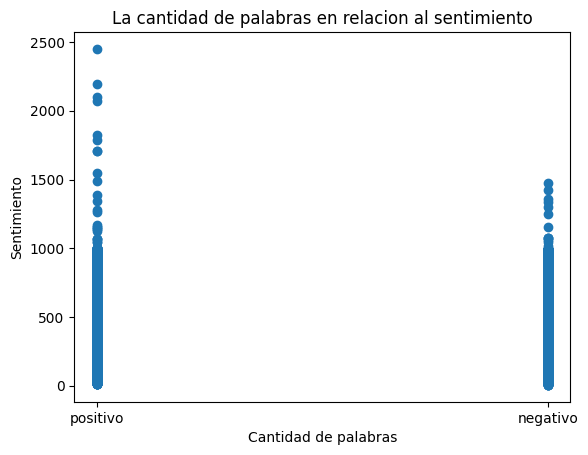

In [3]:
df['num_palabras'] = df['review_es'].str.split().apply(len)
plt.scatter(df['sentimiento'], df['num_palabras'])
plt.xlabel('Cantidad de palabras')
plt.ylabel('Sentimiento')
plt.title('La cantidad de palabras en relacion al sentimiento')
plt.show()

In [4]:
df.review_es

0        Uno de los otros críticos ha mencionado que de...
1        Una pequeña pequeña producción.La técnica de f...
2        Pensé que esta era una manera maravillosa de p...
3        Básicamente, hay una familia donde un niño peq...
4        El "amor en el tiempo" de Petter Mattei es una...
                               ...                        
49995    Pensé que esta película hizo un buen trabajo a...
49996    Mala parcela, mal diálogo, mala actuación, dir...
49997    Soy católica enseñada en escuelas primarias pa...
49998    Voy a tener que estar en desacuerdo con el com...
49999    Nadie espera que las películas de Star Trek se...
Name: review_es, Length: 50000, dtype: object

In [5]:
!pip install nltk

Hacemos el train test split con 30% test y 70% train

Ahora utilizamos nltk para ahcer stemming de las reviews

In [5]:
import pandas as pd
import nltk
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.utils import shuffle

# Descargar recursos adicionales de NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Inicializar stemmer en español
stemmer = SnowballStemmer('spanish')

# Función para aplicar el stemming a una oración
def stem_sentence(sentence):
    words = nltk.word_tokenize(sentence)
    stemmed_words = [stemmer.stem(word) for word in words]
    return ' '.join(stemmed_words)

# Aplicar el stemming a la columna df.review_es y guardar en una nueva columna
df['stemmed_review'] = df['review_es'].apply(stem_sentence)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LUCAS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
df['stemmed_review'].head()

0    uno de los otros critic ha mencion que despues...
1    una pequeñ pequeñ produccion.l tecnic de filma...
2    pens que esta era una maner maravill de pas ti...
3    basic , hay una famili dond un niñ pequeñ ( ja...
4    el `` amor en el tiemp '' de pett mattei es un...
Name: stemmed_review, dtype: object

In [7]:
#Data Preprocessing 
X_train, X_test, y_train, y_test = train_test_split(df.stemmed_review, 
                                                    df.sentimiento,
                                                    test_size=0.30,
                                                    random_state=25,
                                                    shuffle=True)

In [8]:
X_train

26254    de hech , en realid no disfrut de esta pelicul...
29815    ... era par que pud , en buen concienci , dil ...
42848    no pud evit disfrut de tod la premis del gat e...
26015    la pelicul de largometr cgi se acab de ser lan...
38873    ok , asi que una noch yo y algun amig decid qu...
                               ...                        
35702    en un intent no total exit de ser tom en seri ...
26767    el cas de la col de scorpion es un giall alt e...
6618     atlantis : el imperi perd es una mejor pelicul...
24894    pens que esta seri iba a ser otra seri de acci...
29828    vi esta pelicul com una chic muy jov ( ahor te...
Name: stemmed_review, Length: 35000, dtype: object

### Entrenamos el modelo

Utilizamos TfidfVectorizer y CountVectorizer para tokenizar 

In [9]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score

# Armamos los modelos
model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model2 = make_pipeline(CountVectorizer(), MultinomialNB())
# Entrenamos los modelos
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
# Hacemos un predict del test
predicted_categories = model.predict(X_test)
predicted_categories_2 = model2.predict(X_test)

In [10]:
print(predicted_categories)
print(predicted_categories_2)

['positivo' 'positivo' 'positivo' ... 'negativo' 'positivo' 'positivo']
['positivo' 'negativo' 'positivo' ... 'negativo' 'positivo' 'positivo']


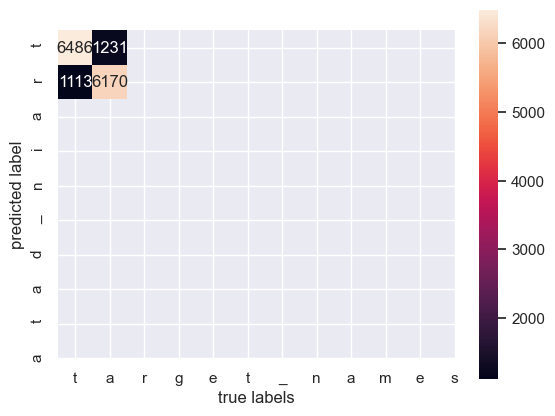

The accuracy using TfidfVectorizer  is 0.8437333333333333
The precision is TfidfVectorizer 0.8437333333333333
The accuracy count is  0.8272
The precision count is 0.8272


In [11]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
sns.set() # use seaborn plotting style

# plot the confusion matrix
mat = confusion_matrix(y_test, predicted_categories)
sns.heatmap(mat.T, square = True, annot=True, fmt = "d", xticklabels="target_names",yticklabels="train_data")
plt.xlabel("true labels")
plt.ylabel("predicted label")
plt.show()

print("The accuracy using TfidfVectorizer  is {}".format(accuracy_score(y_test, predicted_categories)))
print("The precision is TfidfVectorizer {}".format(precision_score(y_test, predicted_categories, average='micro',)))
print("The accuracy count is  {}".format(accuracy_score(y_test, predicted_categories_2)))
print("The precision count is {}".format(precision_score(y_test, predicted_categories_2, average='micro',)))


Metricas con TfidVectorizer

F1 Score: 0.8403704712612368
Accuracy Score: 0.8437333333333333
Recall Score: 0.8336711255235779
Precision Score: 0.847178360565701
              precision    recall  f1-score   support

    negativo       0.84      0.85      0.85      7599
    positivo       0.85      0.83      0.84      7401

    accuracy                           0.84     15000
   macro avg       0.84      0.84      0.84     15000
weighted avg       0.84      0.84      0.84     15000



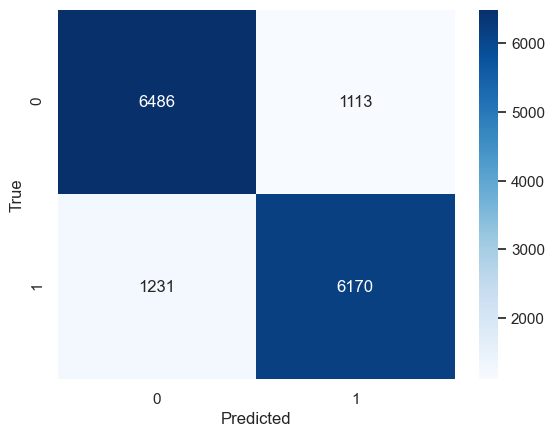

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer, f1_score

print(f"F1 Score: {f1_score(y_test,predicted_categories, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,predicted_categories)}")
print(f"Recall Score: {recall_score(y_test,predicted_categories, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,predicted_categories, pos_label='positivo')}")

cm = confusion_matrix(y_test,predicted_categories)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,predicted_categories))

Metricas CountVectorizer

F1 Score: 0.8174904942965779
Accuracy Score: 0.8272
Recall Score: 0.7843534657478719
Precision Score: 0.8535509483899426
              precision    recall  f1-score   support

    negativo       0.81      0.87      0.84      7599
    positivo       0.85      0.78      0.82      7401

    accuracy                           0.83     15000
   macro avg       0.83      0.83      0.83     15000
weighted avg       0.83      0.83      0.83     15000



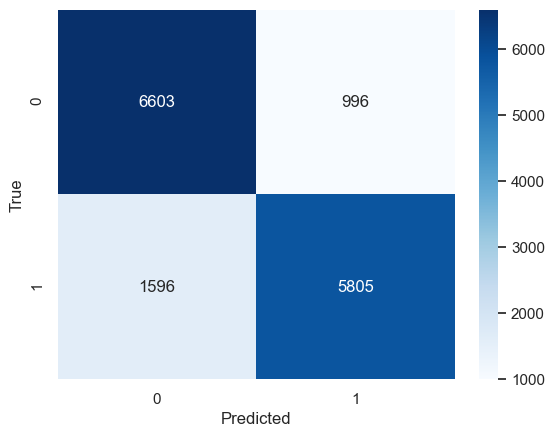

In [17]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import make_scorer, f1_score

print(f"F1 Score: {f1_score(y_test,predicted_categories_2, pos_label= 'positivo')}")
print(f"Accuracy Score: {accuracy_score(y_test,predicted_categories_2)}")
print(f"Recall Score: {recall_score(y_test,predicted_categories_2, pos_label='positivo')}")
print(f"Precision Score: {precision_score(y_test,predicted_categories_2, pos_label='positivo')}")

cm = confusion_matrix(y_test,predicted_categories_2)
sns.heatmap(cm, cmap='Blues',annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('True')

#Reporte
print(classification_report(y_test,predicted_categories_2))

Como TfidfVectorizer  nos dio mejores resultados, usaremos el modelo que lo usa para hacer el predict de kaggle

### Predict de Kaggle

In [12]:
df_kaggle = pd.read_csv('./test.csv')
df_kaggle['stemmed_review'] = df_kaggle['review_es'].apply(stem_sentence)
y_pred_kaggle_cv = model.predict(df_kaggle.stemmed_review)
ds_kaggle = pd.DataFrame({'ID': df_kaggle['ID'], 'sentimiento': y_pred_kaggle_cv.ravel()})

print(ds_kaggle.shape)
ds_kaggle.to_csv('pred_kaggle_Bayes_Naive_4.csv', index=False)

(8599, 2)


### Guardamos el modelo

In [33]:
# Guardar el arbol
import joblib
filename = 'BayesNaive_v3.sav'
joblib.dump(model, filename)

['BayesNaive_v3.sav']